In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
def requests_get(url):
    r = requests.get(url)
    return r

In [3]:
def dump_json(name, r):
    with open(name, 'w') as file:
        json.dump(r.json(), file)

In [4]:
def load_json(name):
    with open(name) as file:
        data = json.load(file)
        return data

In [5]:
url1 = 'https://api.publicapis.org/entries'
api1 = requests_get(url1)

In [6]:
dump_json('public', api1)

In [7]:
data1 = load_json('public')

In [8]:
df1 = pd.DataFrame(data1)
df1

,count,entries
0,940,"{'API': 'Axolotl', 'Description': 'Collection ..."
1,940,"{'API': 'Cat Facts', 'Description': 'Daily cat..."
2,940,"{'API': 'Cataas', 'Description': 'Cat as a ser..."
3,940,"{'API': 'catAPI', 'Description': 'Random pictu..."
4,940,"{'API': 'Cats', 'Description': 'Pictures of ca..."
...,...,...
935,940,"{'API': 'Troposphere', 'Description': 'Global ..."
936,940,"{'API': 'Visual Crossing', 'Description': 'Glo..."
937,940,"{'API': 'weather-api', 'Description': 'A RESTf..."
938,940,"{'API': 'Weatherbit', 'Description': 'Weather'..."


In [10]:
df1 = pd.DataFrame(data1['entries'])
df1

,API,Description,Auth,HTTPS,Cors,Link,Category
0,Axolotl,Collection of axolotl pictures and facts,,True,unknown,https://theaxolotlapi.netlify.app/,Animals
1,Cat Facts,Daily cat facts,,True,no,https://alexwohlbruck.github.io/cat-facts/,Animals
2,Cataas,Cat as a service (cats pictures and gifs),,True,unknown,https://cataas.com/,Animals
3,catAPI,Random pictures of cats,,True,yes,https://github.com/ThatCopy/catAPI/wiki/Usage,Animals
4,Cats,Pictures of cats from Tumblr,apiKey,True,unknown,https://docs.thecatapi.com/,Animals
...,...,...,...,...,...,...,...
935,Troposphere,Global weather and climate data,apiKey,True,yes,https://www.troposphere.io/developer,Weather
936,Visual Crossing,Global historical and weather forecast data,apiKey,True,yes,https://www.visualcrossing.com/weather-api,Weather
937,weather-api,A RESTful free API to check the weather,,True,no,https://github.com/robertoduessmann/weather-api,Weather
938,Weatherbit,Weather,apiKey,True,unknown,https://www.weatherbit.io/api,Weather


In [13]:
category_count = df1['Category'].value_counts()
category_count

Development                     82
Geocoding                       66
Games & Comics                  66
Transportation                  52
Government                      44
Cryptocurrency                  39
Science & Math                  28
Music                           28
Social                          28
Video                           26
Weather                         24
Sports & Fitness                23
Personality                     23
Open Data                       23
Security                        22
Finance                         21
Health                          20
Books                           19
Animals                         18
Food & Drink                    16
Photography                     16
Calendar                        16
Machine Learning                16
Test Data                       16
URL Shorteners                  15
Business                        14
Art & Design                    14
News                            14
Jobs                

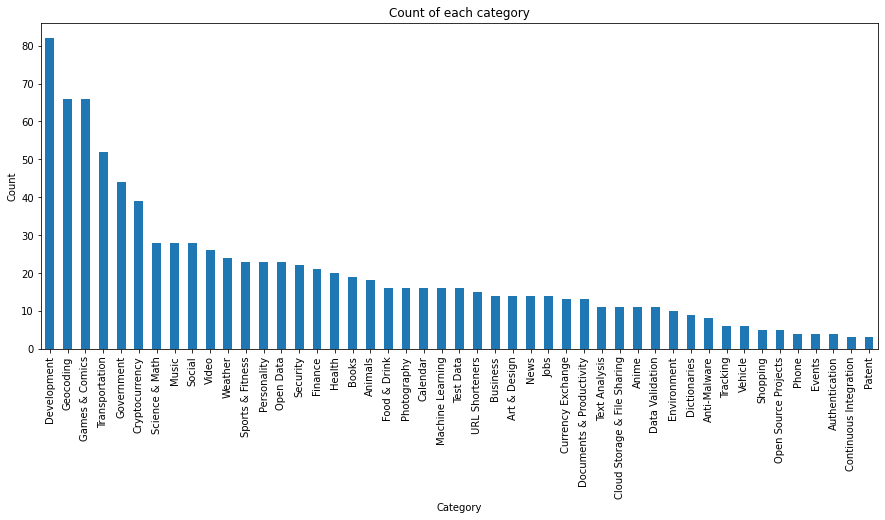

In [14]:
ax = category_count.plot(kind = 'bar', title = "Count of each category", figsize = (15, 6))
ax.set_xlabel("Category")
ax.set_ylabel("Count")
plt.show()

In [15]:
url2 = 'https://datausa.io/api/data?drilldowns=Nation&measures=Population'
api2 = requests_get(url2)

In [16]:
dump_json('usa', api2)

In [17]:
data2 = load_json('usa')

In [18]:
df2 = pd.DataFrame(data2['data'])
df2

,ID Nation,Nation,ID Year,Year,Population,Slug Nation
0,01000US,United States,2019,2019,328239523,united-states
1,01000US,United States,2018,2018,327167439,united-states
2,01000US,United States,2017,2017,325719178,united-states
3,01000US,United States,2016,2016,323127515,united-states
4,01000US,United States,2015,2015,321418821,united-states
5,01000US,United States,2014,2014,318857056,united-states
6,01000US,United States,2013,2013,316128839,united-states


In [20]:
df2.sort_values(['Year'], inplace = True)
df2

,ID Nation,Nation,ID Year,Year,Population,Slug Nation
6,01000US,United States,2013,2013,316128839,united-states
5,01000US,United States,2014,2014,318857056,united-states
4,01000US,United States,2015,2015,321418821,united-states
3,01000US,United States,2016,2016,323127515,united-states
2,01000US,United States,2017,2017,325719178,united-states
1,01000US,United States,2018,2018,327167439,united-states
0,01000US,United States,2019,2019,328239523,united-states


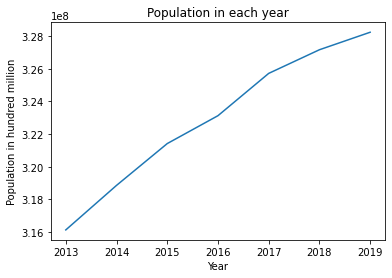

In [22]:
plt.plot(df2['Year'], df2['Population'])
plt.title("Population in each year")
plt.xlabel("Year")
plt.ylabel("Population in hundred million")
plt.show()

In [23]:
url3 = 'http://universities.hipolabs.com/search?country=United+States'
api3 = requests_get(url3)

In [24]:
dump_json('university', api3)

In [25]:
data3 = load_json('university')

In [26]:
df3 = pd.DataFrame(data3)
df3

,country,name,alpha_two_code,state-province,domains,web_pages
0,United States,Marywood University,US,None,[marywood.edu],[http://www.marywood.edu]
1,United States,Lindenwood University,US,None,[lindenwood.edu],[http://www.lindenwood.edu/]
2,United States,Sullivan University,US,None,[sullivan.edu],[https://sullivan.edu/]
3,United States,Florida State College at Jacksonville,US,None,[fscj.edu],[https://www.fscj.edu/]
4,United States,Xavier University,US,None,[xavier.edu],[https://www.xavier.edu/]
...,...,...,...,...,...,...
2168,United States,Gulf Coast State College,US,Florida,[gulfcoast.edu],[https://www.gulfcoast.edu/]
2169,United States,Academy of Art University,US,California,"[academyart.edu, art.edu]",[https://www.academyart.edu/]
2170,United States,Lenoir-Rhyne University,US,North Carolina,[lr.edu],[https://www.lr.edu/]
2171,United States,Point Park University,US,Pennsylvania,[pointpark.edu],[https://pointpark.edu/]


In [28]:
state_count = df3['state-province'].value_counts()
state_count

Pennsylvania      28
TX                 2
CA                 2
North Carolina     1
Ohio               1
California         1
ND                 1
Washington         1
IN                 1
MI                 1
Michigan           1
Florida            1
Name: state-province, dtype: int64

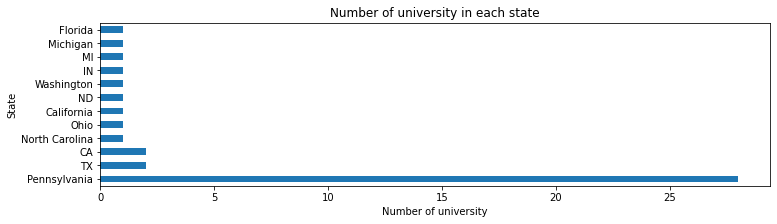

In [29]:
ax2 = state_count.plot(kind = 'barh', title = "Number of university in each state", figsize = (12, 3))
ax2.set_xlabel("Number of university")
ax2.set_ylabel("State")
plt.show()

In [30]:
url4 = 'https://www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita'
api4 = requests_get(url4)

In [31]:
dump_json('cocktail', api4)

In [32]:
data4 = load_json('cocktail')

In [33]:
df4 = pd.DataFrame(data4)
df4

,drinks
0,"{'idDrink': '11007', 'strDrink': 'Margarita', ..."
1,"{'idDrink': '11118', 'strDrink': 'Blue Margari..."
2,"{'idDrink': '17216', 'strDrink': 'Tommy's Marg..."
3,"{'idDrink': '16158', 'strDrink': 'Whitecap Mar..."
4,"{'idDrink': '12322', 'strDrink': 'Strawberry M..."
5,"{'idDrink': '178332', 'strDrink': 'Smashed Wat..."


In [35]:
df4 = pd.DataFrame(data4['drinks'])
df4

,idDrink,strDrink,strDrinkAlternate,strTags,strVideo,strCategory,strIBA,strAlcoholic,strGlass,strInstructions,...,strMeasure10,strMeasure11,strMeasure12,strMeasure13,strMeasure14,strMeasure15,strImageSource,strImageAttribution,strCreativeCommonsConfirmed,dateModified
0,11007,Margarita,None,"IBA,ContemporaryClassic",None,Ordinary Drink,Contemporary Classics,Alcoholic,Cocktail glass,Rub the rim of the glass with the lime slice t...,...,None,None,None,None,None,None,https://commons.wikimedia.org/wiki/File:Klassi...,Cocktailmarler,Yes,2015-08-18 14:42:59
1,11118,Blue Margarita,None,None,None,Ordinary Drink,None,Alcoholic,Cocktail glass,Rub rim of cocktail glass with lime juice. Dip...,...,None,None,None,None,None,None,None,None,Yes,2015-08-18 14:51:53
2,17216,Tommy's Margarita,None,"IBA,NewEra",None,Ordinary Drink,New Era Drinks,Alcoholic,Old-Fashioned glass,Shake and strain into a chilled cocktail glass.,...,None,None,None,None,None,None,None,None,No,2017-09-02 18:37:54
3,16158,Whitecap Margarita,None,None,None,Other/Unknown,None,Alcoholic,Margarita/Coupette glass,Place all ingredients in a blender and blend u...,...,None,None,None,None,None,None,None,None,No,2015-09-02 17:00:22
4,12322,Strawberry Margarita,None,None,None,Ordinary Drink,None,Alcoholic,Cocktail glass,Rub rim of cocktail glass with lemon juice and...,...,None,None,None,None,None,None,None,None,No,2015-08-18 14:41:51
5,178332,Smashed Watermelon Margarita,None,None,None,Cocktail,None,Alcoholic,Collins glass,In a mason jar muddle the watermelon and 5 min...,...,None,None,None,None,None,None,None,None,No,None


In [36]:
cocktail_count = df4['strCategory'].value_counts()
cocktail_count

Ordinary Drink    4
Other/Unknown     1
Cocktail          1
Name: strCategory, dtype: int64

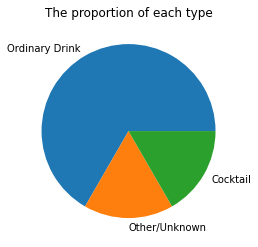

In [37]:
ax3 = cocktail_count.plot(kind = 'pie', title = "The proportion of each type")
plt.ylabel("")
plt.show()

In [38]:
url5 = 'http://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline'
api5 = requests_get(url5)

In [39]:
dump_json('makeup', api5)

In [40]:
data5 = load_json('makeup')

In [41]:
df5 = pd.DataFrame(data5)
df5

,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
0,495,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/991799...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,5.0,None,bronzer,[],2016-10-01T18:36:15.012Z,2017-12-23T21:08:50.624Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
1,488,maybelline,Maybelline Fit Me Bronzer,10.29,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/d4f7d8...,https://well.ca/products/maybelline-fit-me-bro...,https://well.ca,Why You'll Love It\n\nLightweight pigments ble...,4.5,None,bronzer,[],2016-10-01T18:36:05.584Z,2017-12-23T21:08:49.985Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#CF9978', 'colour_name': 'Medi..."
2,477,maybelline,Maybelline Facestudio Master Contour Kit,15.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/4f731d...,https://well.ca/products/maybelline-facestudio...,https://well.ca,Maybelline Facestudio Master Contour Kit is th...,NaN,None,bronzer,[],2016-10-01T18:35:40.504Z,2017-12-23T21:08:48.157Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#9B7163', 'colour_name': None}..."
3,468,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/462103...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,NaN,powder,blush,[],2016-10-01T18:35:27.706Z,2017-12-23T21:08:47.102Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
4,452,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/e8c59b...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,5.0,powder,blush,[],2016-10-01T18:35:07.476Z,2017-12-23T20:51:17.460Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
5,439,maybelline,Maybelline Fit Me Blush,10.29,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/53d5f8...,https://well.ca/products/maybelline-fit-me-blu...,https://well.ca,Maybelline Fit Me Blush has lightweight pigmen...,4.8,powder,blush,[],2016-10-01T18:34:46.302Z,2017-12-23T21:08:45.097Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#FB8684', 'colour_name': 'Deep..."
6,414,maybelline,Maybelline Dream Bouncy Blush,11.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/51eacb...,https://well.ca/products/maybelline-dream-boun...,https://well.ca,"Now, blush has bounce! Freshest flush ever:• N...",4.5,cream,blush,[],2016-10-01T18:34:17.251Z,2017-12-23T21:08:40.418Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#ecc3d5', 'colour_name': 'Fres..."
7,398,maybelline,Maybelline Color Sensational Lipliner,8.29,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/6607c1...,https://well.ca/products/maybelline-color-sens...,https://well.ca,Keep your Maybelline lip color beautiful with ...,3.5,None,lip_liner,[],2016-10-01T18:33:39.513Z,2017-12-23T21:08:35.034Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#A15638', 'colour_name': 'Nude..."
8,382,maybelline,Maybelline Dream Smooth Mousse Foundation,14.79,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/fb79e7...,https://well.ca/products/maybelline-dream-smoo...,https://well.ca,Why You'll Love ItUnique cream-whipped foundat...,3.8,cream,foundation,[],201

In [42]:
df5.dtypes

id                      int64
brand                  object
name                   object
price                  object
price_sign             object
currency               object
image_link             object
product_link           object
website_link           object
description            object
rating                float64
category               object
product_type           object
tag_list               object
created_at             object
updated_at             object
product_api_url        object
api_featured_image     object
product_colors         object
dtype: object

In [43]:
df5['price'] = df5.price.astype(float)
df5.dtypes

id                      int64
brand                  object
name                   object
price                 float64
price_sign             object
currency               object
image_link             object
product_link           object
website_link           object
description            object
rating                float64
category               object
product_type           object
tag_list               object
created_at             object
updated_at             object
product_api_url        object
api_featured_image     object
product_colors         object
dtype: object

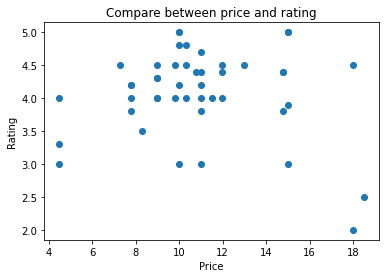

In [45]:
plt.scatter(df5['price'], df5['rating'])
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title('Compare between price and rating')
plt.show()